In [1]:
import numpy as np
from scipy.stats import pearsonr
import torch
import matplotlib.pyplot as plt

In [72]:
L = 100

a_e = 1
a_s = 0
# c =  [ max( a_e, a_e+(a_s-a_e)*(1-(i/L))) for i in range(L)]

# plt.plot(torch.arange(100), c)

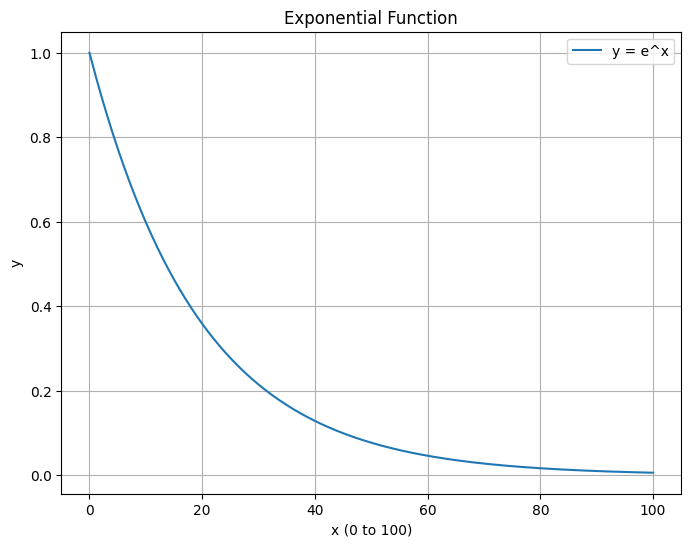

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 100
x = np.linspace(0, 100, 400)

# Calculate y values using the exponential function
y =a_e + (a_s-a_e)*0.95**x

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = e^x')

# Set labels and title
plt.xlabel('x (0 to 100)')
plt.ylabel('y')
plt.title('Exponential Function')

# Remove the y-axis limits
# plt.ylim(0, 10)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

/tmp/ipykernel_1854625/1762912389.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(torch.arange(100), c_sig, "g--", color=colors[2])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


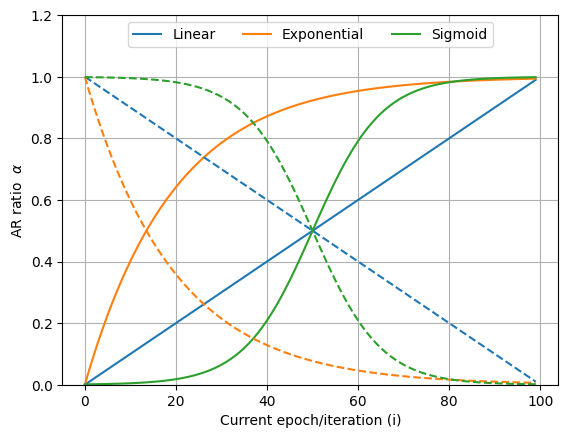

In [161]:
a_e = 1.0
a_s = 0.0

c_lin =  [ (a_e-a_s)/(L)*i + a_s for i in range(L)]
k_e = 0.95
c_exp =  [ a_e + (a_s-a_e)*k_e**i for i in range(L)]

k_s = 0.15
c_sig = [ (0.5*(a_e-a_s))*(1 + np.tanh(((i/L)-0.5)/k_s)) for i in range(L)]


colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]


plt.plot(torch.arange(100), c_lin, label= "Linear", color=colors[0])
plt.plot(torch.arange(100), c_exp, label="Exponential", color=colors[1])
plt.plot(torch.arange(100), c_sig, label="Sigmoid", color=colors[2])

a_e = 0
a_s = 1.0

c_lin =  [ (a_e-a_s)/(L)*i + a_s for i in range(L)]
k_e = 0.95
c_exp =  [ a_e + (a_s-a_e)*k_e**i for i in range(L)]

k_s = 0.15
c_sig = [ 1+((0.5*(a_e-a_s))*(1 + np.tanh(((i/L)-0.5)/k_s)) )for i in range(L)]


plt.plot(torch.arange(100), c_lin, "--", color=colors[0])
plt.plot(torch.arange(100), c_exp, "--", color=colors[1])
plt.plot(torch.arange(100), c_sig, "g--", color=colors[2])

plt.grid()

plt.xlabel("Current epoch/iteration (i)")
plt.ylabel(r"AR ratio  $\alpha$")
plt.legend(loc="upper center", ncol=3)
# plt.xlim([0,100])
plt.ylim([0,1.2])



is_save= True #False #False #True# False #True
save_loc = "/mnt/scratch/scoc/constant_autoregression/result/figures/curriculum_function.eps"
save_format = "eps"
if is_save:
    #plt.tight_layout()
    plt.savefig(save_loc, format=save_format)


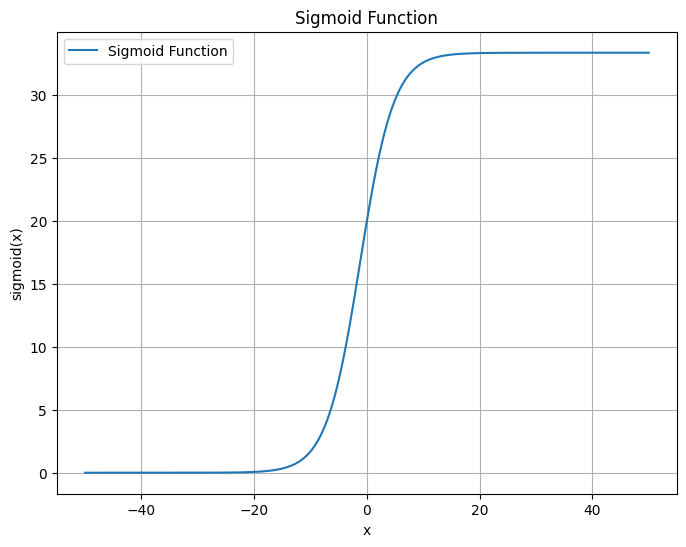

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid function.

    Parameters:
    x: A scalar or numpy array.

    Returns:
    The sigmoid of x.
    """
    return (50 / (1.5 + np.exp(-x/3))) 

# Generate x values from -10 to 10
x = np.linspace(-50, 50, 400)

# Calculate y values using the sigmoid function
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')

# Set labels and title
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [2]:
def pearson_correlation(input: torch.Tensor, target: torch.Tensor, reduce_batch: bool = True):
    B = input.size(0)
    T = input.size(1)
    input = input.reshape(B, T, -1)
    target = target.reshape(B, T, -1)
    input_mean = torch.mean(input, dim=(2), keepdim=True)
    target_mean = torch.mean(target, dim=(2), keepdim=True)
    # Unbiased since we use unbiased estimates in covariance
    input_std = torch.std(input, dim=(2), unbiased=False)
    target_std = torch.std(target, dim=(2), unbiased=False)

    corr = torch.mean((input - input_mean) * (target - target_mean), dim=2) / (input_std * target_std).clamp(
        min=torch.finfo(torch.float32).tiny
    )  # shape (B, T)
    if reduce_batch:
        corr = torch.mean(corr, dim=0)
    return corr


In [3]:
file_loc = "/mnt/scratch/scoc/constant_autoregression/result/KS1/FNO/AR/run_1_dup_paper/run_1_dup_paper_best_epoch_proto_1.pt"
test_auto_stwl = torch.load(file_loc, map_location="cpu")

In [4]:
ans = pearson_correlation(test_auto_stwl["test_ro"][1], test_auto_stwl["test_ro"][2])

In [6]:
torch.mean(ans)

tensor(0.6911)

In [12]:
test_auto_stwl["test_ro"][1].shape

torch.Size([128, 256, 159])

In [21]:
criterion = torch.nn.MSELoss(reduction="none")

In [22]:
err = criterion(torch.rand(5,256,10),torch.rand(5,256,10))


In [23]:
err.shape

torch.Size([5, 256, 10])

In [19]:
no_of_samp = (16,2)
total_range = 140
dt = 4

In [20]:
torch.tensor([t for t in range(0, (total_range -  (no_of_samp[1] + ((no_of_samp[1] -1)*(dt-1)) ) + 1 ))])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135])

In [18]:
torch.arange(130,total_range,dt)

tensor([130, 134, 138])

In [15]:
import h5py

In [17]:
hdf5_train_file = h5py.File("/mnt/scratch/scoc/constant_autoregression/dataset/data/KS1/KS1_train.h5", 'r')

In [21]:
train_loaded_data = hdf5_train_file['train']['pde_640-256']

In [22]:
train_loaded_data.shape

(2048, 640, 256)

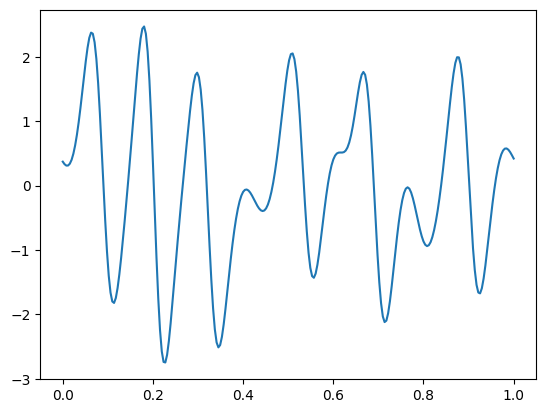

In [12]:
i = 300
plt.plot(torch.linspace(0,1,256), train_loaded_data[i,0,:])

In [37]:
train_loaded_data.keys()

<KeysViewHDF5 ['dt', 'dx', 'pde_640-256', 't', 'x']>

## Load data

In [2]:
dataset_train_path = "/mnt/scratch/scoc/constant_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K1_N2_Sa2100.npy"
hdf5_train_file = np.load(dataset_train_path)
print(hdf5_train_file.shape)
train_loaded_data = hdf5_train_file[0, :2100]
train_tensor =  train_loaded_data.squeeze()
train_data = torch.from_numpy(train_tensor.copy()).float()
#train_data = train_data - train_data.mean(-1).unsqueeze(-1)
train_data = train_data[...,::4].permute(0,2,1)
print(train_data.shape)

(1, 2100, 201, 1024)
torch.Size([2100, 256, 201])


## sample dataset

In [3]:
total_range = train_data.shape[-1]
no_of_samp = (2100, 10)

In [4]:
init_time_stamp_range = torch.tensor([t for t in range(0, total_range -  no_of_samp[1])])
random_steps = init_time_stamp_range[torch.randint(len(init_time_stamp_range), (no_of_samp[0],))]

indicies = torch.ones((no_of_samp) )
for i in range(no_of_samp[0]):
    start = random_steps[i]
    final_time_stamp_range = torch.tensor([t for t in range(start +  no_of_samp[1] , total_range)])
    end = final_time_stamp_range[torch.randperm(len(final_time_stamp_range))[0]]
    indicies[i] = torch.sort(start + torch.randint(end-start, (1,no_of_samp[1]) ))[0]
indicies = indicies.long()

In [7]:
indicies[:5]

tensor([[ 20,  36,  42,  54,  70,  82,  95, 102, 111, 111],
        [160, 161, 162, 162, 163, 163, 167, 171, 173, 174],
        [154, 156, 157, 158, 161, 162, 164, 167, 167, 169],
        [180, 183, 183, 184, 187, 187, 187, 188, 191, 191],
        [183, 185, 186, 187, 187, 189, 191, 191, 192, 193]])

In [5]:
#train_data_sampled = train_data[5:6].repeat(no_of_samp[0],1,1)
train_data_sampled = train_data#[5:6].repeat(no_of_samp[0],1,1)
print(train_data_sampled.shape)

torch.Size([2100, 256, 201])


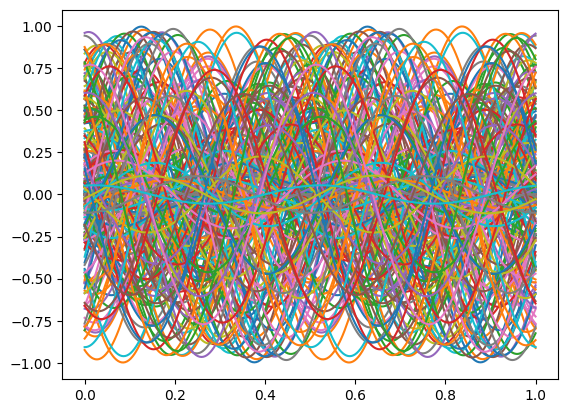

In [6]:
for i in range(0,2100,10):
    plt.plot(torch.linspace(0,1,256), train_data_sampled[i,:,0] )

In [8]:

train_data_resampled = torch.gather(train_data_sampled, -1, indicies.unsqueeze(1).repeat((1,train_data_sampled.shape[1],1)) )
print(train_data_resampled.shape)
train_data_resampled_input = train_data_resampled[...,:no_of_samp[1]//2]
train_data_resampled_output = train_data_resampled[...,no_of_samp[1]//2:]

print(train_data_resampled_input.shape)
print(train_data_resampled_output.shape)

torch.Size([2100, 256, 10])
torch.Size([2100, 256, 5])
torch.Size([2100, 256, 5])


## Overall correlation btw input and output

In [9]:
correlation_coefficients = []
for batch_index in range(train_data_resampled.shape[0]):
    input_vec = train_data_resampled_input[batch_index].reshape(-1)  # Flatten resolution and time
    output_vec = train_data_resampled_output[batch_index].reshape(-1)
    corr, _ = pearsonr(input_vec, output_vec)  # Calculate Pearson correlation
    correlation_coefficients.append(corr)

average_correlation = np.mean(correlation_coefficients)
print(f"Average Pearson Correlation across batches: {average_correlation}")

Average Pearson Correlation across batches: 0.9920473098754883


## Correlation at Each Resolution Point

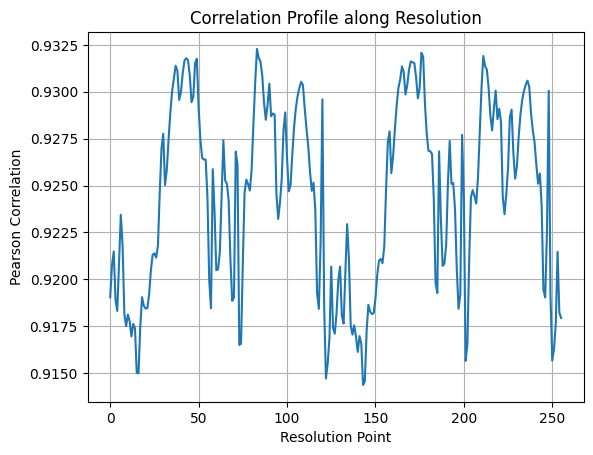

In [11]:
resolution_correlations = []
for res_point in range(train_data_resampled.shape[1]): # Iterate over resolution
    input_data_res = train_data_resampled_input[:, res_point, :].reshape(-1) # Flatten time dimension for all batches at this resolution
    output_data_res = train_data_resampled_output[:, res_point, :].reshape(-1)
    corr, _ = pearsonr(input_data_res, output_data_res)
    resolution_correlations.append(corr)

plt.plot(range(train_data_resampled.shape[1]), resolution_correlations)
plt.xlabel("Resolution Point")
plt.ylabel("Pearson Correlation")
plt.title("Correlation Profile along Resolution")
plt.grid(True)
plt.show()

## Bernouli distribtion

In [39]:
import random

def bernoulli_sample(p):
  """
  Samples from a Bernoulli distribution with probability p.

  Args:
    p: The probability of success (getting a 1). Must be between 0 and 1.

  Returns:
    1 with probability p, and 0 with probability 1-p.
  """
  if not 0 <= p <= 1:
    raise ValueError("Probability p must be between 0 and 1.")

  # Generate a random float between 0 and 1
  random_number = random.random()

  # If the random number is less than p, consider it a "success" (1)
  if random_number < p:
    return 1
  else:
    return 0

# Example usage:
probability_of_success = 0

# Sample a few times
for _ in range(5):
  sample = bernoulli_sample(probability_of_success)
  print(f"Sample: {sample}")

# # You can also use it to simulate many trials and estimate the probability

# num_trials = 10000
# num_successes = 0
# for _ in range(num_trials):
#   if bernoulli_sample(probability_of_success) == 1:
#     num_successes += 1

# estimated_probability = num_successes / num_trials
# print(f"\nEstimated probability after {num_trials} trials: {estimated_probability}")

Sample: 0
Sample: 0
Sample: 0
Sample: 0
Sample: 0
